# Task_1

##### Task 1. Figure out all possible event types.
##### Task 2. Visualize videos like rate (likes count to time dashboard).
##### Task 3. Figure out how often each person views videos with at least one tag that is the same as one from user categories. So you should count when some user with some categories in his profile (user categories: cute, travel) watches some video with some tags attached to it (video tags: travel, mountains) and there is at least one similar tag and category (in this example the "travel" is common). Calculate per user both: how many times there was a common tag/category, and how many times there was not.You can come up with additional use cases and implement them. 

In [4]:
import csv
import json
import os
from datetime import datetime

import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd

#### **Create new one-line jsonl file with specified name**

In [5]:
def create_jsonl_file_from_raw_file(path: str, save_to: str):
    
    dirname = os.path.dirname(path)
    file = os.path.basename(path).split('.')[0]
    
    with open(path, 'r') as fl:
        texts = fl.read()
        line = replace_string(texts)
     

        with open(f'{dirname}/{save_to}.jsonl', 'w') as new_fl:
            new_fl.write(line)

##### Remove from lines backspace, tabs and replace  **'}{'    to   '}\n{'**

In [6]:
def replace_string(texts: str) -> str:
    return texts.replace('\n', '').replace(' ', '').replace('\t', '').replace('}{', '}\n{')

#### **Read data from JSONL file, save to JSON** 

In [7]:
def read_jsonl_save_to_json(path: str):
    
    dirname = os.path.dirname(path)
    file = os.path.basename(path).split('.')[0]
    temp = []
    with open(f'{dirname}/{file}.json', 'w') as fl:
        for line in get_json_line_from_file(path, is_json=False):
            temp.append(line)
        json.dump(temp, fl, indent=4)
            

#### **Get DataFrame from JSON file**

In [8]:
def df_from_json(file: str, key1: str = None, key2: str = None) -> pd.DataFrame:
    
    if key1 is None and key2 is None:
        return pd.read_json(file)

    return get_df_from_json_by_key(file, key1, key2)

#### If json type is nested we use key 

In [9]:
def get_df_from_json_by_key(file: str, key1: str, key2: str) -> pd.DataFrame:
    df_list = []
    
    for line in get_json_line_from_file(file, is_json=True):
       
        if key1 in line:
            df = pd.json_normalize(line, key1)
       
        elif key2 in line:
            df = pd.DataFrame.from_dict(line)
        
        else:
            df = pd.json_normalize(line)
            
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

#### Generator function to yield line by line

In [10]:
def get_json_line_from_file(path: str, is_json: bool = False):
    with open(path) as file:
        
        if is_json:
            data = json.load(file)
            for line in data:
                yield line
        else:

            for line in file:
                yield json.loads(line)

#### **If CSV data has an absent header name, we use Key to group by key**

In [11]:
def df_from_csv(file: str, key: str = None) -> pd.DataFrame:
    dataframes = []
    with open(file, 'r') as fl:
        reader = csv.DictReader(fl)
        
        for row in reader:
            temp = convert_str_to_list_by_key(row, key)
            
            if temp:
                df =pd.DataFrame.from_dict(temp)
            else:
                df = pd.json_normalize(row)
            dataframes.append(df)
    df = pd.concat(dataframes, ignore_index=True)
    return df

#### function gets dict, if values are grouped in the string, it splits and puts to list

In [12]:
def convert_str_to_list_by_key(row: dict[str, str], key: str) -> dict[str, list] or None:
    value = row.get(key)
    if value:
        row[key] = list(value.split(";"))
        value = row
    return value

In [13]:
create_jsonl_file_from_raw_file('data/events-hr.jsonl', 'events_hr')

read_jsonl_save_to_json('data/events_hr.jsonl')
read_jsonl_save_to_json('data/events.jsonl')


In [14]:
events = df_from_json('data/events.json', key1="events", key2='tags')
events_hr = df_from_json('data/events_hr.json')

users = df_from_csv('data/users.csv', 'categories')
users_011 = df_from_csv('data/users-011.csv', 'categories')

videos = df_from_csv('data/videos.csv')

In [15]:
events

,user_id,video_id,event,timestamp,tags,comment
0,1,100,created,1642663347,cute,NaN
1,1,100,created,1642663347,duck,NaN
2,1,100,created,1642663347,animals,NaN
3,4,100,like,1642943347,NaN,NaN
4,2,100,like,1642953347,NaN,NaN
5,2,100,commented,1642954347,NaN,"oh, it's so cute!!!!"
6,3,100,commented,1642964347,NaN,I will buy my own
7,1,100,add_tags,1642968347,food,NaN
8,5,100,like,1642994347,NaN,NaN
9,6,100,like,1642998347,NaN,NaN


In [16]:
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='s')
events

,user_id,video_id,event,timestamp,tags,comment
0,1,100,created,2022-01-20 07:22:27,cute,NaN
1,1,100,created,2022-01-20 07:22:27,duck,NaN
2,1,100,created,2022-01-20 07:22:27,animals,NaN
3,4,100,like,2022-01-23 13:09:07,NaN,NaN
4,2,100,like,2022-01-23 15:55:47,NaN,NaN
5,2,100,commented,2022-01-23 16:12:27,NaN,"oh, it's so cute!!!!"
6,3,100,commented,2022-01-23 18:59:07,NaN,I will buy my own
7,1,100,add_tags,2022-01-23 20:05:47,food,NaN
8,5,100,like,2022-01-24 03:19:07,NaN,NaN
9,6,100,like,2022-01-24 04:25:47,NaN,NaN


#### **Task 1. Figure out all possible event types.**

In [17]:
events['event'].unique()

array(['created', 'like', 'commented', 'add_tags', 'remove_tags'],
      dtype=object)

In [18]:
events.columns

Index(['user_id', 'video_id', 'event', 'timestamp', 'tags', 'comment'], dtype='object')

#### **Task 2. Visualize videos like rate (likes count to time dashboard).**

In [19]:
video_by_like = events[['video_id', 'event', 'timestamp']] [events['event'] =='like']

# add new column - date
video_by_like['date'] = video_by_like['timestamp'].dt.date

# group by event count
video_by_like = video_by_like.groupby(['video_id', 'date'], as_index=False).agg({'event': 'count'})

video_by_like

,video_id,date,event
0,100,2022-01-23,2
1,100,2022-01-24,2
2,101,2022-01-20,3
3,101,2022-01-21,2
4,101,2022-01-25,1
5,110,2022-01-25,1


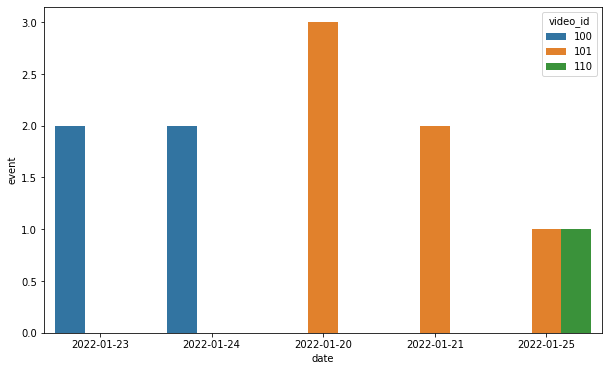

In [20]:
plt.figure(figsize=(10, 6))

sns.barplot(x="date", hue="video_id", y="event", data=video_by_like)
plt.show()

In [296]:
# # getting unique video id
# video_id = video_by_like['video_id'].unique()

# # f1, ax1 = plt.subplots(1, 1)
# f2, ax2 = plt.subplots(1, 3)
# # f1.set_size_inches(10, 5)
# f2.set_size_inches(20, 5)
# for index, id in enumerate(video_id):

#     # Break data frame by video id and grouped by data
#     grouped_by_data = video_by_like[video_by_like['video_id'] == id]

#     ax2[index].set_title(f'video_id={id}')
#     ax2[index].set_ylabel('Likes Count')
#     ax2[index].set_xlabel('Date')
    
#     ax2[index].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
#     ax2[index].bar(grouped_by_data['date'], grouped_by_data['event'])
    
#     # ax1.bar(grouped_by_data['date'], grouped_by_data['event'], width=0.2)
#     ax1.legend(video_id)
#     plt.gcf().autofmt_xdate()


### TASK_3
Figure out how often each person views videos with at least one tag that is the same as one from user categories. So you should count when some user with some categories in his profile (user categories: cute, travel) watches some video with some tags attached to it (video tags: travel, mountains) and there is at least one similar tag and category (in this example the "travel" is common). Calculate per user both: how many times there was a common tag/category, and how many times there was not.You can come up with additional use cases and implement them. 

In [19]:
# users = df_from_csv('data/users.csv', 'categories')
# users_011 = df_from_csv('data/users-011.csv', 'categories')

# videos = df_from_csv('data/videos.csv')

In [21]:
events = df_from_json('data/events.json', key1="events")

# users = df_from_csv('data/users.csv', 'categories')
users = df_from_csv('data/users.csv')

user_011 = df_from_csv('data/users-011.csv', 'categories')
videos = df_from_csv('data/videos.csv')

In [22]:
# Converting timestamp ti datetime
events['date'] = pd.to_datetime(events['timestamp'], unit='s').dt.date

events = events[['user_id', 'video_id', 'event', 'date', 'tags']]
events

,user_id,video_id,event,date,tags
0,1,100,created,2022-01-20,"[cute, duck, animals]"
1,4,100,like,2022-01-23,NaN
2,2,100,like,2022-01-23,NaN
3,2,100,commented,2022-01-23,NaN
4,3,100,commented,2022-01-23,NaN
5,1,100,add_tags,2022-01-23,[food]
6,5,100,like,2022-01-24,NaN
7,6,100,like,2022-01-24,NaN
8,3,101,created,2022-01-20,"[travel, bicycle, mountains]"
9,6,101,commented,2022-01-20,NaN


In [23]:
#change column users.id from str to int
users['id'] = users['id'].astype(int)

#rename column 'id' to 'user_id'
users.rename(columns={'id': 'user_id'}, inplace=True)

users = users[['user_id', 'fname', 'lname', 'categories']]
users

,user_id,fname,lname,categories
0,0,John,Smith,animals;duck;cute;travel
1,1,Bob,Johnson,animals;duck;bicycle
2,2,Alan,Miller,duck;cute;bicycle
3,3,Mary,Jones,animals;cute;travel;bicycle;mountains
4,4,Emily,Williams,animals;duck
5,5,Laura,Anderson,food;cute
6,6,Mary,Smith,animals;food;travel;mountains
7,7,Bob,Miller,animals;food;travel;bicycle
8,8,Mary,Anderson,animals;food;travel;bicycle
9,9,Bob,Anderson,


In [24]:
# change type of column video['id'] from str to int
videos['id'] = videos['id'].astype(int)


videos = videos[['id', 'name', 'creator_id']]

# rename column videos['id'] to video['video_id']
videos.rename(columns={'id': 'video_id'}, inplace=True)
videos

,video_id,name,creator_id
0,100,Cute duck is eating potatoes,1
1,101,Travel on my bicycle,7
2,110,Home,6
3,999,hhh,s


In [25]:
# merging events and users on key user_id and then marging with dataframe videos on key video_id
all_df = events.merge(users, how='left', on='user_id').sort_values('user_id',ignore_index=True) \
        .merge(videos, how='left', on='video_id') \
        .sort_values(['user_id', 'video_id'])
all_df

,user_id,video_id,event,date,tags,fname,lname,categories,name,creator_id
0,0,101,like,2022-01-20,NaN,John,Smith,animals;duck;cute;travel,Travel on my bicycle,7
1,1,100,created,2022-01-20,"[cute, duck, animals]",Bob,Johnson,animals;duck;bicycle,Cute duck is eating potatoes,1
2,1,100,add_tags,2022-01-23,[food],Bob,Johnson,animals;duck;bicycle,Cute duck is eating potatoes,1
3,1,101,like,2022-01-20,NaN,Bob,Johnson,animals;duck;bicycle,Travel on my bicycle,7
4,2,100,like,2022-01-23,NaN,Alan,Miller,duck;cute;bicycle,Cute duck is eating potatoes,1
5,2,100,commented,2022-01-23,NaN,Alan,Miller,duck;cute;bicycle,Cute duck is eating potatoes,1
6,2,101,remove_tags,2022-01-20,[mountains],Alan,Miller,duck;cute;bicycle,Travel on my bicycle,7
7,3,100,commented,2022-01-23,NaN,Mary,Jones,animals;cute;travel;bicycle;mountains,Cute duck is eating potatoes,1
8,3,101,created,2022-01-20,"[travel, bicycle, mountains]",Mary,Jones,animals;cute;travel;bicycle;mountains,Travel on my bicycle,7
11,4,100,like,2022-01-23,NaN,Emily,Williams,animals;duck,Cute duck is eating potatoes,1


### Figure out how often each person views videos with at least one tag that is the same as one from user categories. 

#### the function gets the list and string and checks if the element of the list in the string

In [26]:
def is_list_elem_in_string(texts: list[str], text: str) -> bool:
    return any([elem.lower() in text.lower() for elem in texts])
    

#### create a new data frame based on whether the categories exist in the name

In [27]:
with_common_teg = all_df[all_df.apply(lambda x: is_list_elem_in_string(x['categories'].split(';'), x['name']), axis=1)].sort_values('user_id')
with_common_teg

,user_id,video_id,event,date,tags,fname,lname,categories,name,creator_id
0,0,101,like,2022-01-20,NaN,John,Smith,animals;duck;cute;travel,Travel on my bicycle,7
1,1,100,created,2022-01-20,"[cute, duck, animals]",Bob,Johnson,animals;duck;bicycle,Cute duck is eating potatoes,1
2,1,100,add_tags,2022-01-23,[food],Bob,Johnson,animals;duck;bicycle,Cute duck is eating potatoes,1
3,1,101,like,2022-01-20,NaN,Bob,Johnson,animals;duck;bicycle,Travel on my bicycle,7
4,2,100,like,2022-01-23,NaN,Alan,Miller,duck;cute;bicycle,Cute duck is eating potatoes,1
5,2,100,commented,2022-01-23,NaN,Alan,Miller,duck;cute;bicycle,Cute duck is eating potatoes,1
6,2,101,remove_tags,2022-01-20,[mountains],Alan,Miller,duck;cute;bicycle,Travel on my bicycle,7
7,3,100,commented,2022-01-23,NaN,Mary,Jones,animals;cute;travel;bicycle;mountains,Cute duck is eating potatoes,1
8,3,101,created,2022-01-20,"[travel, bicycle, mountains]",Mary,Jones,animals;cute;travel;bicycle;mountains,Travel on my bicycle,7
11,4,100,like,2022-01-23,NaN,Emily,Williams,animals;duck,Cute duck is eating potatoes,1


In [28]:
result = with_common_teg \
    .groupby(['user_id', 'fname', 'lname', 'video_id', 'date'], as_index=False) \
    .agg({'event': 'count'}) \
    .rename(columns={'event': 'like_count'})

result

,user_id,fname,lname,video_id,date,like_count
0,0,John,Smith,101,2022-01-20,1
1,1,Bob,Johnson,100,2022-01-20,1
2,1,Bob,Johnson,100,2022-01-23,1
3,1,Bob,Johnson,101,2022-01-20,1
4,2,Alan,Miller,100,2022-01-23,2
5,2,Alan,Miller,101,2022-01-20,1
6,3,Mary,Jones,100,2022-01-23,1
7,3,Mary,Jones,101,2022-01-20,1
8,4,Emily,Williams,100,2022-01-23,1
9,5,Laura,Anderson,100,2022-01-24,1


### WITHOUT TEG

In [31]:
without_teg = all_df[all_df.apply(lambda x: not is_list_elem_in_string(x['categories'].split(';'), x['name']), axis=1)].sort_values('user_id')
without_teg

,user_id,video_id,event,date,tags,fname,lname,categories,name,creator_id
9,4,101,like,2022-01-25,NaN,Emily,Williams,animals;duck,Travel on my bicycle,7
12,4,101,commented,2022-01-25,NaN,Emily,Williams,animals;duck,Travel on my bicycle,7
10,4,110,like,2022-01-25,NaN,Emily,Williams,animals;duck,Home,6
14,5,101,like,2022-01-21,NaN,Laura,Anderson,food;cute,Travel on my bicycle,7
15,6,100,like,2022-01-24,NaN,Mary,Smith,animals;food;travel;mountains,Cute duck is eating potatoes,1


In [32]:
result_without_teg = without_teg \
    .groupby(['user_id', 'fname', 'lname', 'video_id', 'date'], as_index=False) \
    .agg({'event': 'count'}) \
    .rename(columns={'event': 'like_count'})

result_without_teg

,user_id,fname,lname,video_id,date,like_count
0,4,Emily,Williams,101,2022-01-25,2
1,4,Emily,Williams,110,2022-01-25,1
2,5,Laura,Anderson,101,2022-01-21,1
3,6,Mary,Smith,100,2022-01-24,1
